# Training a network w/ Tensorflow

In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
#plt.style.use('ggplot')
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

# Creating a Neural Network

## Defining the data

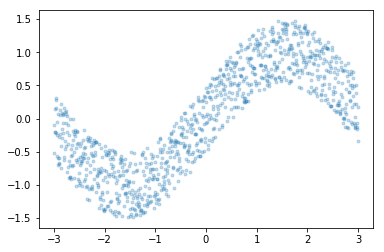

In [2]:
n_sample = 1000
xs = np.linspace(-3, 3, n_sample)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_sample)
plt.scatter(xs, ys, alpha = 0.25, marker = '.')

## Defining Cost

In [3]:
# define the variables
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')
sess = tf.InteractiveSession()
W = tf.Variable(tf.random_normal([1], dtype = tf.float32, stddev = 0.1), name = 'weight')
B = tf.Variable(tf.constant([0], dtype = tf.float32), name = 'bias')
Y_pred = X * W + B

# this function will measure the square distance, known as the l2-norm
def distance(p1, p2):
    return tf.sqrt( tf.abs(p1 - p2) * tf.abs(p1 - p2))

cost = tf.reduce_mean(distance(Y_pred, Y))

## Training Parameters

/Users/light/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.533132
0.473754
0.447017
0.436758
0.431418
0.42828
0.426716
0.425946
0.425542
0.425324
0.425193
0.425133
0.425116


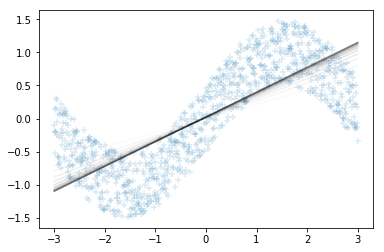

In [4]:
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)
n_iterations = 500
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha = 0.15, marker = '+')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_training_cost = 0.0
    for iter_i in range(n_iterations):
        sess.run(opt, feed_dict = {X : xs, Y : ys})
        training_cost = sess.run(cost, feed_dict = {X : xs, Y : ys})
        # every 10 iterations, output the result
        if iter_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot
            ax.plot(xs, ys_pred, 'k', alpha=iter_i / n_iterations)
            fig.show()
            plt.draw()
            print(training_cost)
        # If converge, stop training
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

# Stochastic and Mini Batch Gradient Descent

In [5]:
def tain_batch(X, Y, sess, opt, batch_size = 200):
    rand_idxs = np.random.permutation(np.arange(len(xs)))
    n_batch = len(rand_idxs) // batch_size
    for batch_i in range(n_batch):
        curIdx, nextIdx = batch_i, batch_i + 1
        batch_list = rand_idxs[curIdx * batch_size : nextIdx * batch_size]
        sess.run(opt, feed_dict = {X : xs[batch_list], Y : ys[batch_list]})
    
def train(X, Y, Y_pred, n_iterations = 1000, batch_size = 200, learning_rate = 0.2):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    opt = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    ax.scatter(xs, ys, alpha = 0.15, marker = '+')
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        prev_training_cost = 0.0
        for iter_i in range(n_iterations):
            tain_batch(X, Y, sess, opt, batch_size)
            training_cost = sess.run(cost, feed_dict = {X : xs, Y : ys})
            
            if np.abs(prev_training_cost - training_cost) < 0.000001:
                break
            if iter_i % 100 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=iter_i / n_iterations)
                print(training_cost)
            prev_training_cost = training_cost
    fig.show()
    plt.draw()  

37.1411
34.557
26.2369
17.4582
15.4423
27.9265
35.8843
11.5113
13.0657
22.2502


/Users/light/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


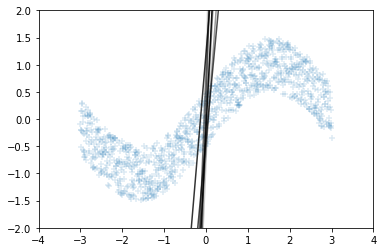

In [6]:
n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))
# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# Instead of multiplying directly, we use tf.matmul to perform a
# matrix multiplication
h = tf.matmul(tf.expand_dims(X, 1), W) + b

# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with our new Y_pred
train(X, Y, Y_pred)

## Polynomial

9.06349
13.3337
35.274
17.8063
34.745
7.84563
29.0865
3.37586
37.0569
37.9196


/Users/light/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


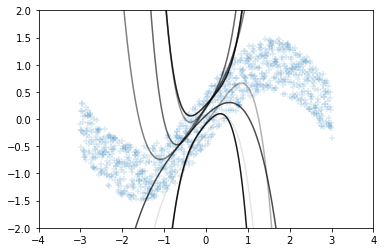

In [7]:
Y_pred = tf.Variable(tf.random_normal([1], name = 'bias'))
for pow_i in range(5):
    W = tf.Variable(tf.random_normal([1], name = 'pow_%d' % pow_i))
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W) , Y_pred)
train(X, Y, Y_pred)

## Sigmoid Function

6.43118
0.604194
0.596583
0.595609
0.595352


/Users/light/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


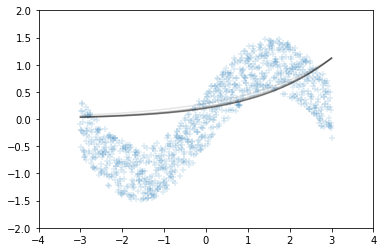

In [8]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name = 'W')
b = tf.Variable(tf.constant(1, dtype = tf.float32, shape = [n_neurons]), name = 'bias')
h = tf.nn.sigmoid(tf.matmul(tf.expand_dims(X, 1), W) + b, name = 'h')
Y_pred = tf.reduce_sum(h, 1)
train(X, Y, Y_pred)

## tanh Function

2.89653
0.269558
0.26712
0.264265
0.26467
0.265201
0.26243
0.2632
0.259153
0.258262


/Users/light/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


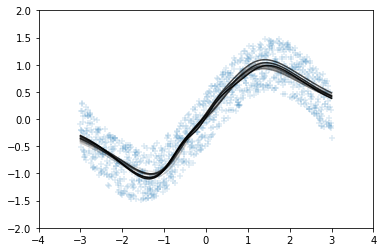

In [9]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name = 'w')
b = tf.Variable(tf.constant(1, dtype = tf.float32, shape = [n_neurons]), name = 'bias')
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name = 'h')
Y_pred = tf.reduce_sum(h, 1)
train(X, Y, Y_pred)

4.4377
0.535617
0.542246
0.535753
0.537082
0.535645
0.535273
0.535026
0.534891
0.534904


/Users/light/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


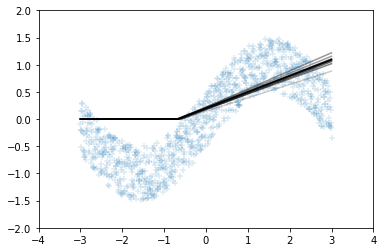

In [10]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name = 'w')
b = tf.Variable(tf.constant(1, dtype = tf.float32, shape = [n_neurons]), name = 'bias')
h = tf.nn.relu(tf.matmul(tf.expand_dims(X, 1), W) + b, name = 'h')
Y_pred = tf.reduce_sum(h, 1)
train(X, Y, Y_pred)

In [11]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

# Image Inpainting

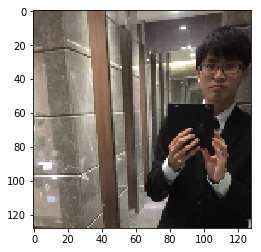

In [12]:
from skimage.data import astronaut
from scipy.misc import imresize
input_img = np.array(plt.imread('../img_preprocessing/img_align_celeba/000011.jpg'))
# img = imresize(astronaut(), (64, 64))
img = imresize(input_img, (128, 128))
plt.imshow(img)

In [13]:
xs, ys = [], []
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs += [row_i, col_i],
        ys += img[row_i, col_i],
xs, ys = np.array(xs), np.array(ys)
xs = (xs - np.mean(xs)) / np.std(xs)
print(xs.shape, ys.shape)
        

(16384, 2) (16384, 3)


In [14]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

## Building the Network

In [ ]:
n_neurons = [2, 128, 64, 64, 64, 64, 128, 3]
cur_input = X
for layer_i in range(1, len(n_neurons)):
    cur_input = linear(
            X = cur_input,
            n_input = n_neurons[layer_i - 1],
            n_output = n_neurons[layer_i],
            activation = tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
            scope = 'Layer_%d' % layer_i)
Y_pred = cur_input

0 90.8969 0.001


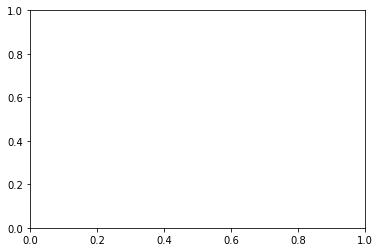

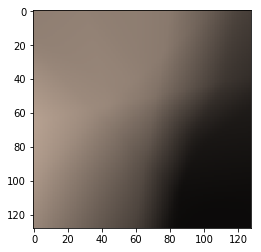

1 91.0789 0.001
2 87.0988 0.002


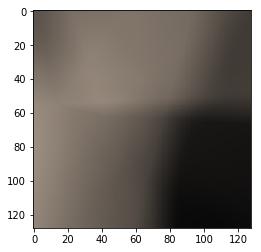

3 85.5143 0.004


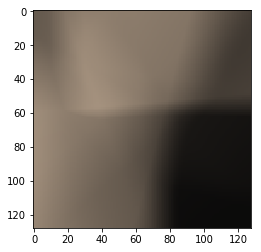

4 83.2539 0.008


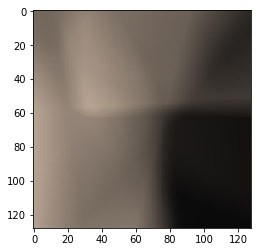

5 82.2892 0.016


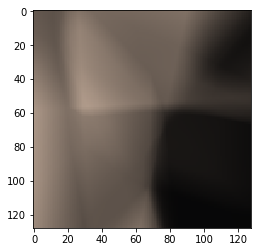

6 78.8747 0.032


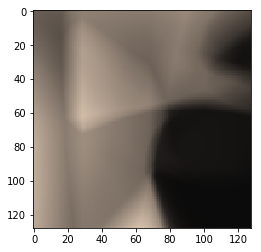

7 74.0563 0.064


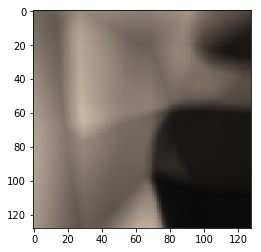

8 74.6676 0.001
9 71.8374 0.002


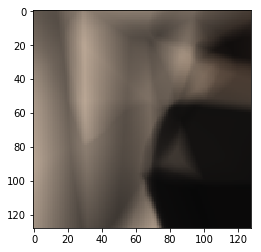

10 70.0487 0.004


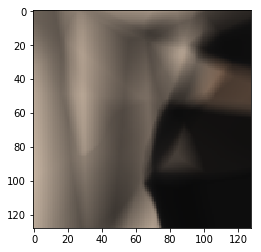

11 68.5662 0.008


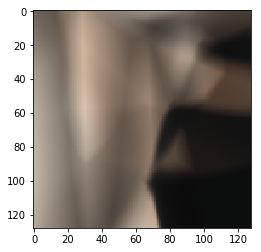

12 69.8933 0.001
13 65.877 0.002


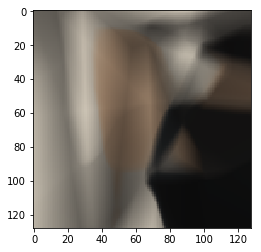

14 68.008 0.001
15 69.3336 0.001
16 60.4167 0.002


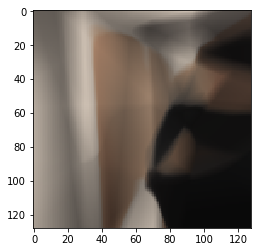

17 61.7543 0.001
18 62.2734 0.001
19 58.6124 0.002


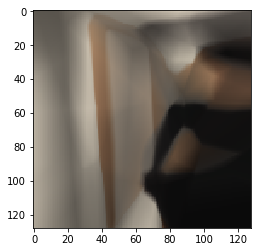

20 56.8675 0.004


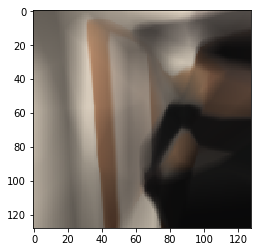

21 55.7659 0.008


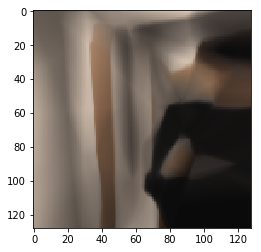

22 59.7993 0.001
23 52.9335 0.002


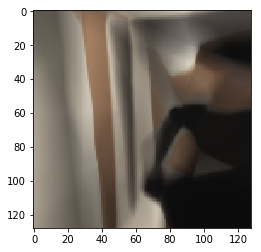

24 52.9288 0.004


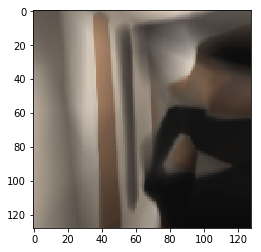

25 54.6127 0.001
26 50.0071 0.002


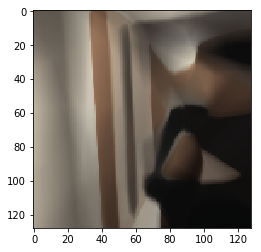

27 48.8428 0.004


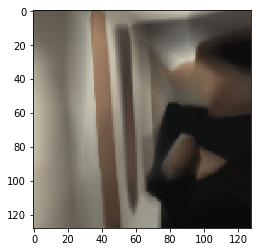

28 46.9334 0.008


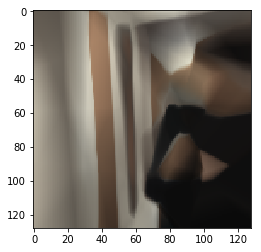

29 50.018 0.001
30 56.2258 0.001
31 45.6536 0.002


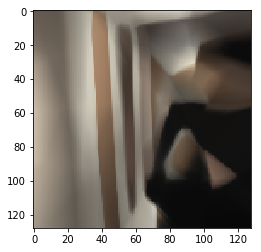

32 49.6038 0.001
33 45.9694 0.002
34 47.7257 0.001
35 47.6837 0.002
36 46.5001 0.004
37 45.7447 0.008
38 45.8033 0.001
39 48.7407 0.001


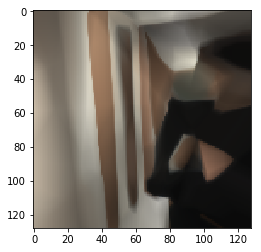

40 48.0633 0.002
41 46.2708 0.004
42 46.2934 0.001
43 45.8943 0.002
44 43.4471 0.004


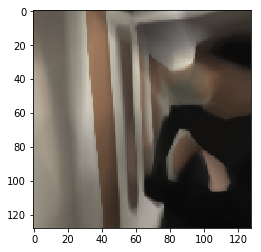

45 44.571 0.001
46 42.1585 0.002


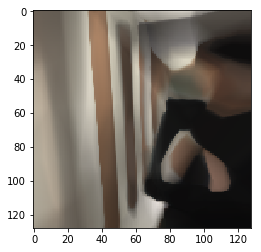

47 42.8962 0.001
48 44.4455 0.001
49 46.1804 0.001
50 43.7407 0.002
51 43.862 0.001
52 46.7526 0.001
53 43.1221 0.002
54 42.4658 0.004
55 43.3726 0.001
56 40.2118 0.002


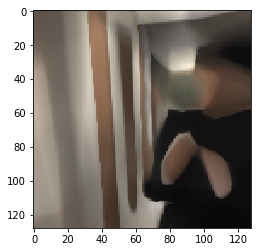

57 40.0005 0.004


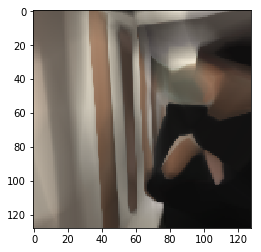

58 42.1414 0.001
59 41.5483 0.002


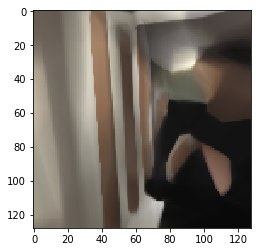

60 41.1271 0.004
61 41.2543 0.001
62 40.8733 0.002
63 43.6574 0.001
64 40.8329 0.002
65 39.1012 0.004


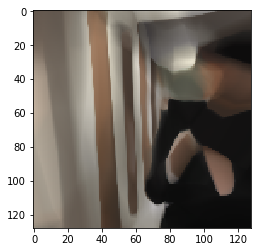

66 41.3035 0.001
67 39.2013 0.002
68 42.6372 0.001
69 39.8703 0.002
70 41.0546 0.001
71 38.1976 0.002


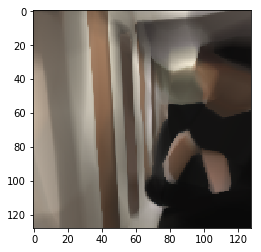

72 37.4588 0.004


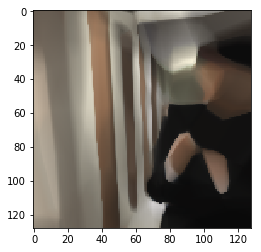

73 41.6593 0.001
74 40.8726 0.002
75 45.5431 0.001
76 39.8542 0.002
77 39.4734 0.004
78 43.1224 0.001
79 41.3583 0.002


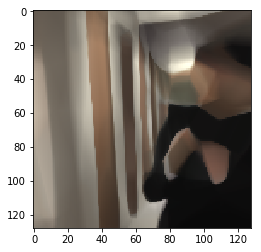

80 41.5644 0.001
81 39.7199 0.002
82 43.1307 0.001
83 40.0728 0.002
84 40.2622 0.001
85 39.5474 0.002
86 39.7553 0.001
87 41.9801 0.001
88 41.3518 0.002
89 41.5754 0.001
90 37.5634 0.002
91 37.546 0.004
92 44.3128 0.001
93 43.2823 0.002
94 42.4848 0.004
95 41.8369 0.008
96 37.3461 0.016


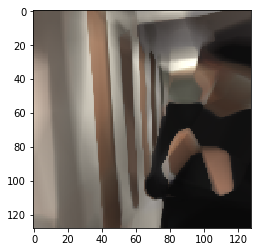

97 38.0913 0.001
98 37.8303 0.002
99 38.6977 0.001


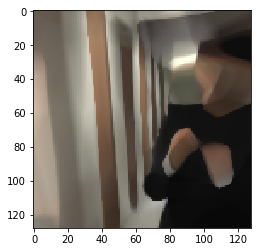

100 38.6343 0.002
101 38.2232 0.004
102 40.7394 0.001
103 36.8769 0.002


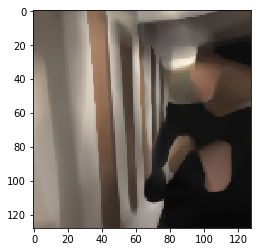

104 39.534 0.001
105 37.6144 0.002
106 38.9707 0.001
107 36.1234 0.002


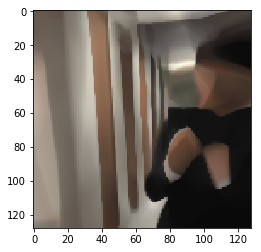

108 44.0842 0.001
109 37.7662 0.002
110 nan 0.001
111 nan 0.001
112 nan 0.001
113 nan 0.001
114 nan 0.001
115 nan 0.001
116 nan 0.001
117 nan 0.001
118 nan 0.001
119 nan 0.001


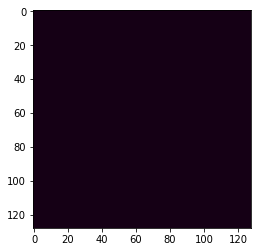

120 nan 0.001
121 nan 0.001
122 nan 0.001
123 nan 0.001
124 nan 0.001
125 nan 0.001
126 nan 0.001
127 nan 0.001
128 nan 0.001


In [ ]:
def train_dynamic_learning_rate(X, Y, Y_pred, img, n_iterations = 500, batch_size = 150, learning_rate = 0.01):
    cost = tf.reduce_mean(tf.reduce_sum(distance(Y_pred, Y), 1))
    #opt = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 39, 64
    #opt = tf.train.AdadeltaOptimizer(learning_rate).minimize(cost) 84
    #opt = tf.train.AdagradOptimizer(learning_rate).minimize(cost) 50
    opt = tf.train.AdamOptimizer(learning_rate).minimize(cost) #35
    #opt = tf.train.MomentumOptimizer(learning_rate, learning_rate / 10).minimize(cost) #43
    #opt = tf.train.FtrlOptimizer(learning_rate).minimize(cost) #82
    #opt = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)  #44
    fig, ax = plt.subplots(1, 1)
    minCost = 1000
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        prev_training_cost = 0.0
        for iter_i in range(n_iterations):
            tain_batch(X, Y, sess, opt, batch_size)
            training_cost = sess.run(cost, feed_dict = {X : xs, Y : ys}) 

            if prev_training_cost > training_cost:
                learning_rate *= 2
            else:
                learning_rate = 0.001
            if np.abs(prev_training_cost - training_cost) < 0.0001:
                break
            print(iter_i, training_cost, learning_rate)
            if (iter_i + 1) % 20 == 0 or minCost > training_cost:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                fig, ax = plt.subplots(1, 1)
                img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
                plt.imshow(img)
                plt.show()
            minCost = min(minCost, training_cost)
            prev_training_cost = training_cost  
train_dynamic_learning_rate(X, Y, Y_pred, img)